In [1]:
# Load the embeddings
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from tqdm import tqdm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load our own Word2Vec embedding
own_w2v = KeyedVectors.load_word2vec_format("own_word2vec.model", binary=True)

In [3]:
# Load pre-trained Word2Vec embedding
google_w2v = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

In [4]:
glove_file = "glove.6B.300d.txt"
glove_embeddings = dict()

with open(glove_file, "r", encoding = "utf-8") as file:
    for line in tqdm(file, desc="Loading embeddings"):
        values = line.split()
        word = values[0]
        try:
            vector = np.asarray(values[1:], dtype=np.float32)
            glove_embeddings[word] = vector
        except ValueError:
            print("Could not convert values to float: ")
        glove_embeddings[word] = vector
        
glove_w2v = Word2Vec(
    sentences=None,  # Don't train on any text data
    vector_size=300,  # Set the embedding dimension
    min_count=1,  # Include all words in the dictionary
)
glove_w2v.wv.add_vectors(list(glove_embeddings.keys()), list(glove_embeddings.values()))

Loading embeddings: 400000it [00:19, 20172.77it/s]


In [5]:
# Choose some words to compare
words = ["cat", "dog", "car", "bus", "happy", "joy", "sad", "depressed", "love", "hate", "book", "paper", "computer", "software", "food", "drink"]

# Calculate similarities using own Word2Vec embedding
own_similarities = []
for word in words:
    similarities = []
    for other_word in words:
        similarity = own_w2v.similarity(word, other_word)
        similarities.append(similarity)
    own_similarities.append(similarities)

# Calculate similarities using google pre-trained Word2Vec embedding
google_similarities = []
for word in words:
    similarities = []
    for other_word in words:
        similarity = google_w2v.similarity(word, other_word)
        similarities.append(similarity)
    google_similarities.append(similarities)

# Calculate similarities using GloVe embedding
glove_similarities = []
for word in words:
    similarities = []
    for other_word in words:
        similarity = glove_w2v.wv.similarity(word, other_word)
        similarities.append(similarity)
    glove_similarities.append(similarities)

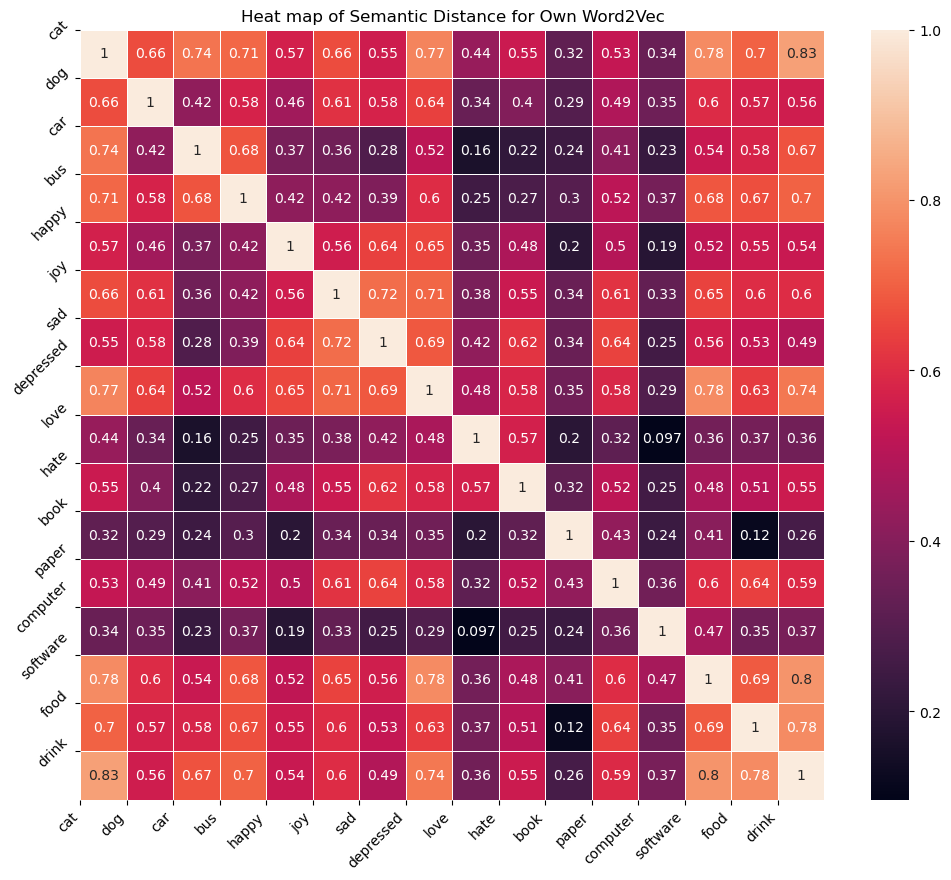

In [6]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(own_similarities, linewidth=0.5, annot=True)
plt.xticks(rotation=45, ha='right')
plt.xticks(range(len(words)), words)
plt.yticks(rotation=45, ha='right')
plt.yticks(range(len(words)), words)
plt.title('Heat map of Semantic Distance for Own Word2Vec')
plt.show()

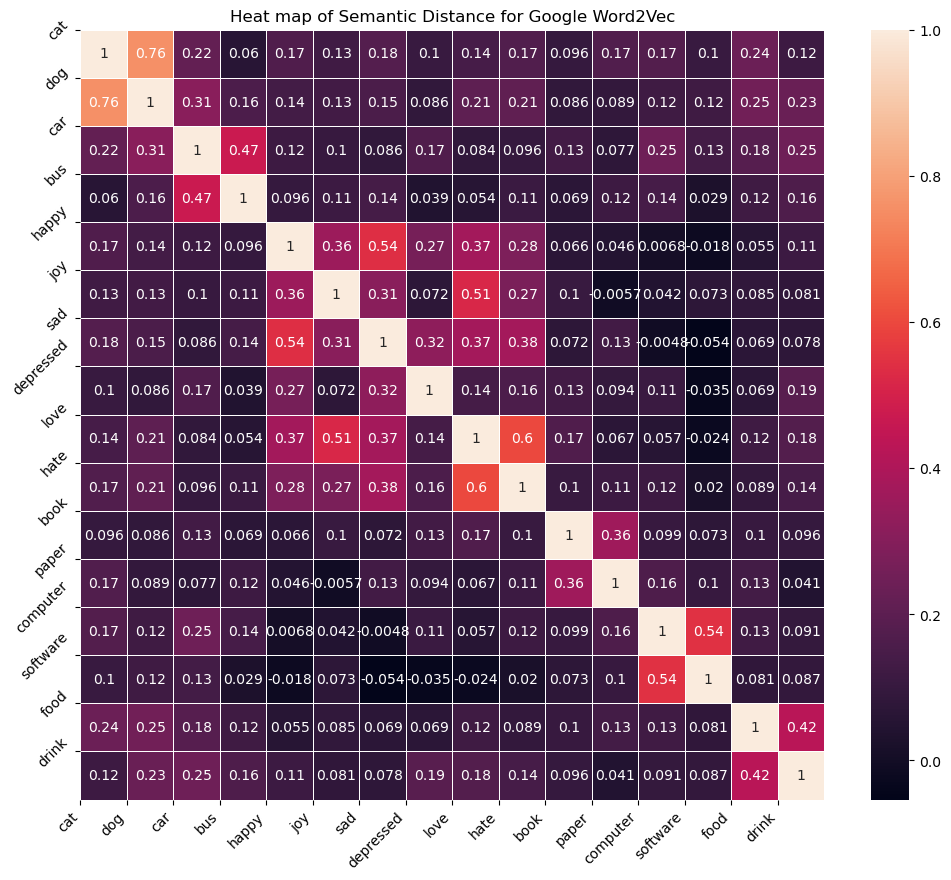

In [7]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(google_similarities, linewidth=0.5, annot=True)
plt.xticks(rotation=45, ha='right')
plt.xticks(range(len(words)), words)
plt.yticks(rotation=45, ha='right')
plt.yticks(range(len(words)), words)
plt.title('Heat map of Semantic Distance for Google Word2Vec')
plt.show()

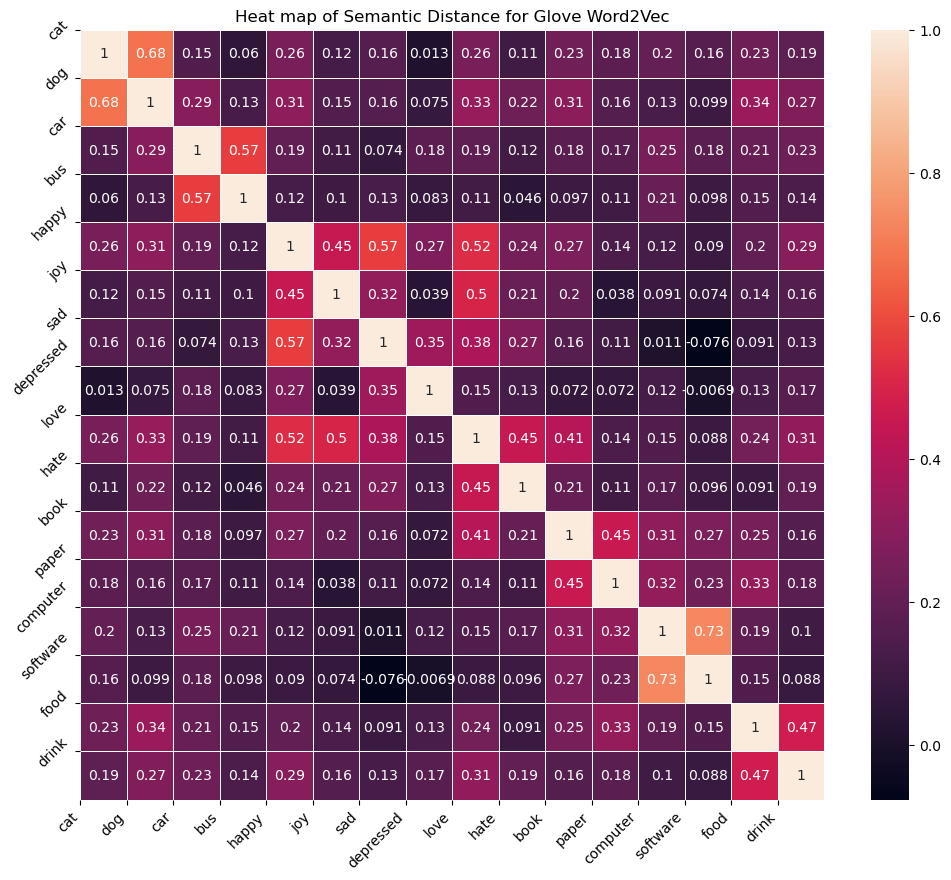

In [8]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(glove_similarities, linewidth=0.5, annot=True)
plt.xticks(rotation=45, ha='right')
plt.xticks(range(len(words)), words)
plt.yticks(rotation=45, ha='right')
plt.yticks(range(len(words)), words)
plt.title('Heat map of Semantic Distance for Glove Word2Vec')
plt.show()

In [9]:
# Visualize the similarities using t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, perplexity=10, verbose = 1)

In [10]:
own_tsne = tsne.fit_transform(own_w2v.vectors)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 14565 samples in 0.004s...
[t-SNE] Computed neighbors for 14565 samples in 3.565s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14565
[t-SNE] Computed conditional probabilities for sample 2000 / 14565
[t-SNE] Computed conditional probabilities for sample 3000 / 14565
[t-SNE] Computed conditional probabilities for sample 4000 / 14565
[t-SNE] Computed conditional probabilities for sample 5000 / 14565
[t-SNE] Computed conditional probabilities for sample 6000 / 14565
[t-SNE] Computed conditional probabilities for sample 7000 / 14565
[t-SNE] Computed conditional probabilities for sample 8000 / 14565
[t-SNE] Computed conditional probabilities for sample 9000 / 14565
[t-SNE] Computed conditional probabilities for sample 10000 / 14565
[t-SNE] Computed conditional probabilities for sample 11000 / 14565
[t-SNE] Computed conditional probabilities for sample 12000 / 14565
[t-SNE] Computed conditional probabilities for sam

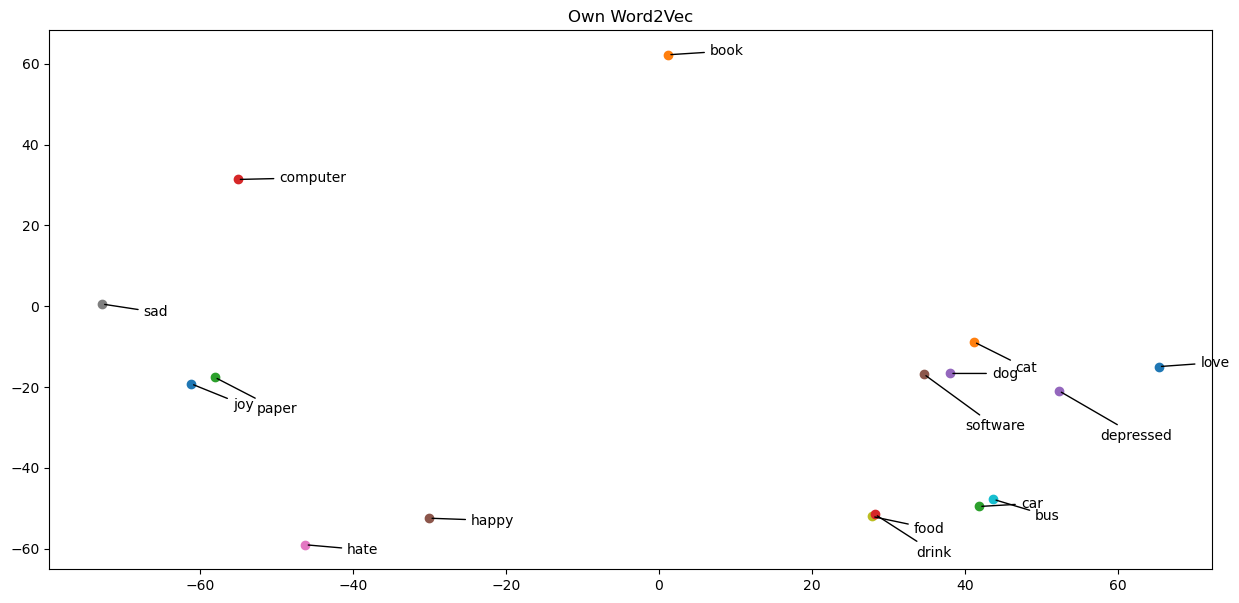

In [23]:
# Plot the results
fig, ax = plt.subplots(figsize=(15, 7))

i = 0
j = 0
for index, word in enumerate(own_w2v.index_to_key):
    if word in words:
        x, y = own_tsne[index]
        ax.scatter(x, y)
        ax.annotate(word, (x, y), xytext=(30, i*j), textcoords='offset points', arrowprops=dict(arrowstyle='-', color='black'))
        i -= 3
        j += 0.06
        
ax.set_title("Own Word2Vec")
plt.show()

In [12]:
google_tsne = tsne.fit_transform(google_w2v.vectors[:100000])

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.021s...
[t-SNE] Computed neighbors for 100000 samples in 166.235s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional proba

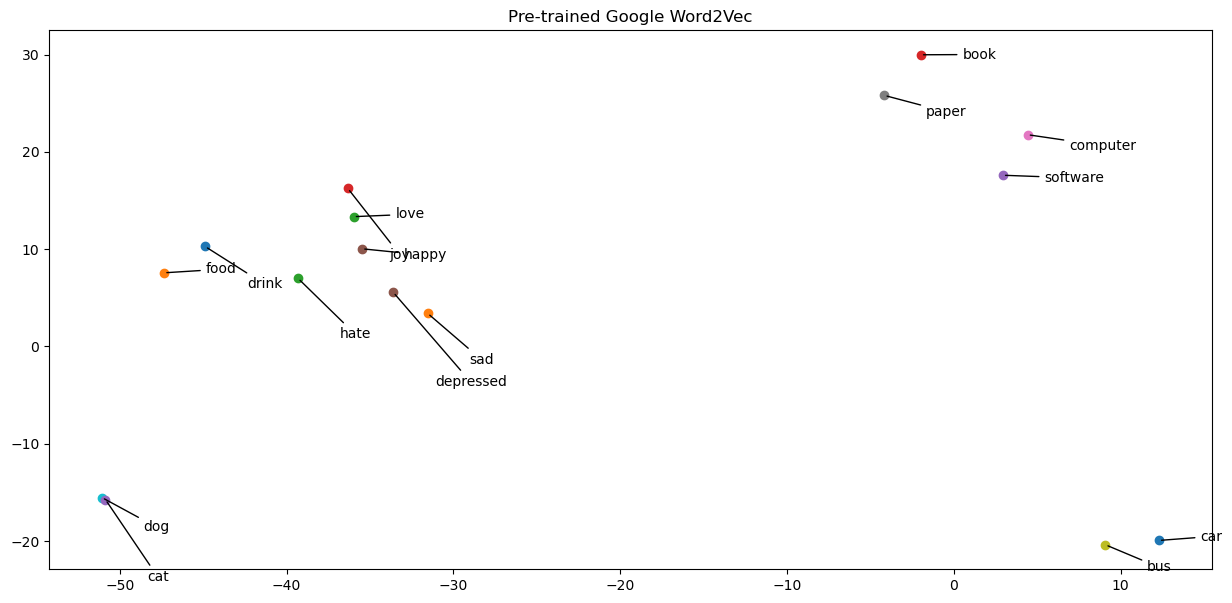

In [13]:
# Plot the results
fig, ax = plt.subplots(figsize=(15, 7))

i = 0
j = 0
for index, word in enumerate(google_w2v.index_to_key):
    if word in words:
        x, y = google_tsne[index]
        ax.scatter(x, y)
        #rot = (i * 30) % 90
        ax.annotate(word, (x, y), xytext=(30, i*j), textcoords='offset points', arrowprops=dict(arrowstyle='-', color='black'))
        i -= 5
        j += 0.06
        
ax.set_title("Pre-trained Google Word2Vec")
plt.show()

In [14]:
glove_tsne = tsne.fit_transform(glove_w2v.wv.vectors[:100000])

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.019s...
[t-SNE] Computed neighbors for 100000 samples in 168.530s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional proba

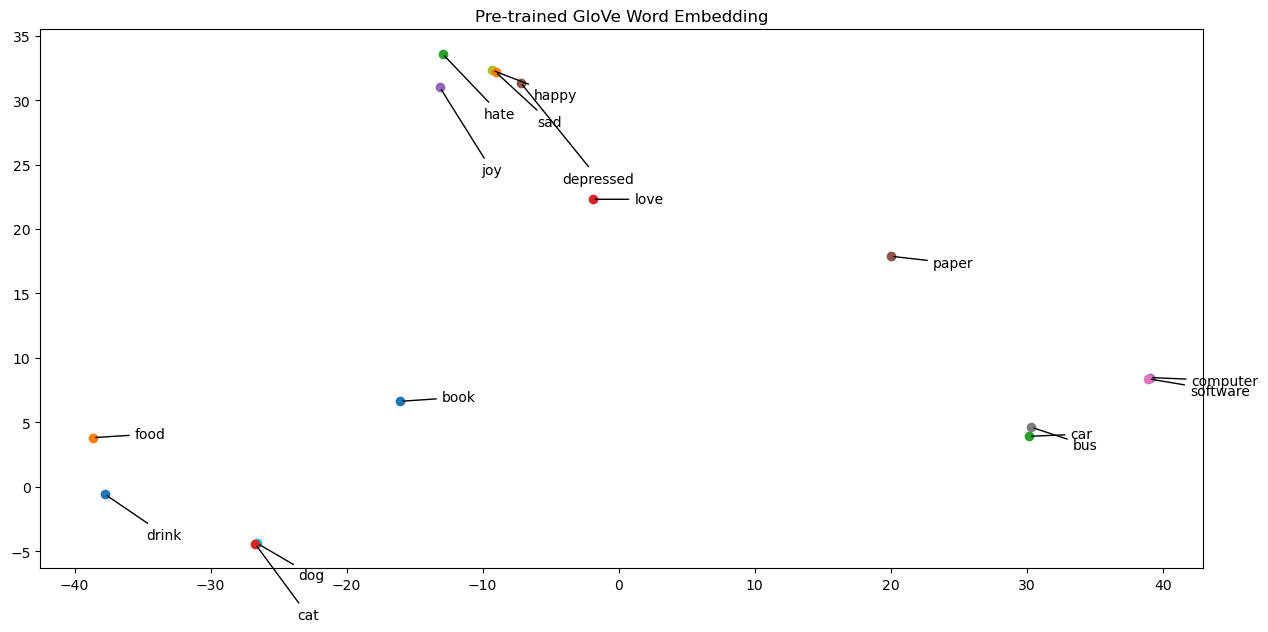

In [22]:
# Plot the results
fig, ax = plt.subplots(figsize=(15, 7))

i = 0
j = 0
for index, word in enumerate(glove_w2v.wv.index_to_key):
    if word in words:
        x, y = glove_tsne[index]
        ax.scatter(x, y)
        ax.annotate(word, (x, y), xytext=(30, i*j), textcoords='offset points', arrowprops=dict(arrowstyle='-', color='black'))
        i -= 8
        j += 0.04
        
ax.set_title("Pre-trained GloVe Word Embedding")
plt.show()